<a href="https://colab.research.google.com/github/AkshiSharma12/InstaBot/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving data.csv to data.csv


In [3]:
import pandas as pd

In [4]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['data.csv']))

In [5]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Benign 357
Malignanat 212


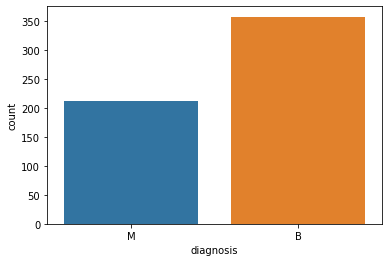

In [6]:
ax= sns.countplot(df['diagnosis'], label ='Count')
B,M = df['diagnosis'].value_counts()
print ('Benign', B)
print ('Malignanat', M)

In [7]:
del df['Unnamed: 32']

In [8]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
INPUT_SIZE = X.shape[1]
ENCODING_SIZE= 10

In [13]:
input_data = Input(shape=(INPUT_SIZE,),name="INPUT_LAYER")
encoded = Dense(15,activation='relu',name="encoded1")(input_data)
encoded = Dense(15,activation='relu',name="encoded2")(encoded)


In [14]:
bottleneck =Dense(ENCODING_SIZE,name="bottleneck")(encoded)


In [15]:
decoded = Dense(15,activation='relu',name="decoded1")(bottleneck)
decoded = Dense(30,activation='relu',name="decoded2")(decoded)
decoded = Dense(INPUT_SIZE,activation='sigmoid',name="OUTPUT_LAYER")(decoded)

In [16]:
autoencoder = Model(input_data,decoded)
print (autoencoder.summary())
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT_LAYER (InputLayer)     [(None, 30)]              0         
_________________________________________________________________
encoded1 (Dense)             (None, 15)                465       
_________________________________________________________________
encoded2 (Dense)             (None, 15)                240       
_________________________________________________________________
bottleneck (Dense)           (None, 10)                160       
_________________________________________________________________
decoded1 (Dense)             (None, 15)                165       
_________________________________________________________________
decoded2 (Dense)             (None, 30)                480       
_________________________________________________________________
OUTPUT_LAYER (Dense)         (None, 30)                930   

In [17]:
autoencoder.fit(X_train, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(X_test,X_test))

Epoch 1/100
2/2 [==============================] - 1s 417ms/step - loss: 0.7041 - accuracy: 0.0402 - val_loss: 0.7033 - val_accuracy: 0.0210
Epoch 2/100
2/2 [==============================] - 0s 31ms/step - loss: 0.7037 - accuracy: 0.0467 - val_loss: 0.7032 - val_accuracy: 0.0210
Epoch 3/100
2/2 [==============================] - 0s 32ms/step - loss: 0.7046 - accuracy: 0.0402 - val_loss: 0.7032 - val_accuracy: 0.0210
Epoch 4/100
2/2 [==============================] - 0s 34ms/step - loss: 0.7043 - accuracy: 0.0480 - val_loss: 0.7032 - val_accuracy: 0.0210
Epoch 5/100
2/2 [==============================] - 0s 32ms/step - loss: 0.7044 - accuracy: 0.0441 - val_loss: 0.7032 - val_accuracy: 0.0210
Epoch 6/100
2/2 [==============================] - 0s 35ms/step - loss: 0.7044 - accuracy: 0.0402 - val_loss: 0.7032 - val_accuracy: 0.0210
Epoch 7/100
2/2 [==============================] - 0s 32ms/step - loss: 0.7043 - accuracy: 0.0428 - val_loss: 0.7032 - val_accuracy: 0.0210
Epoch 8/100
2/2 [==